# Introduction to Neural Networks

## Import packages

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [4]:
X_train[0].shape

(28, 28)

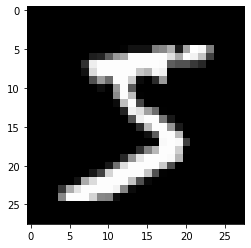

In [5]:
plt.imshow(X_train[0],cmap='gray')

In [6]:
y_train[0]

5

## Preprocessing the image data

In [7]:
image_height,image_width = 28,28

In [8]:
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [9]:
print(X_train[0])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [10]:
X_train /= 255.0
X_test /= 255.0
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [12]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Build a model

![NeuralNet](images/neural-net.png)

In [13]:
model = Sequential()

In [14]:
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10,activation='softmax'))

## Compile the model

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Layer 1 params = input nodes * layer-1 nodes + bias
784*512+512

401920

## Train the model

In [18]:
# Layer 2 params = layer-1 nodes * layer-2 nodes + bias
512*512+512

262656

In [20]:
# Output Layer params = layer-2 nodes * output layer nodes + bias
10*512+10

5130

## What is the accuracy of the model?

### Plot the accuracy of the training model

### Plot the accuracy of training and validation set

### Accuracy of training and validation with loss

## Run a prediction

## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons.
- What results do you get when trying to use another activation function?
- Try a new dataset with your own neural network and see what accuracy you get.

# Convolution Neural Network

## Import the libraries

In [109]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

## Load the data

In [110]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [111]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Pre-processing

In [112]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

batch_size = 128
num_classes = 10
epochs = 3

In [113]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Use the model

In [114]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)                100416    
_________________________________________________________________
dense_24 (Dense)             (None, 10)                650       
Total para

In [ ]:
history_cnn = cnn.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_train,y_train))

Train on 60000 samples, validate on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 73s - loss: 0.1546 - acc: 0.9524 - val_loss: 0.0521 - val_acc: 0.9845
Epoch 2/20
60000/60000 [==============================] - 75s - loss: 0.0488 - acc: 0.9845 - val_loss: 0.0301 - val_acc: 0.9913
Epoch 3/20
60000/60000 [==============================] - 75s - loss: 0.0350 - acc: 0.9890 - val_loss: 0.0204 - val_acc: 0.9939
Epoch 4/20
60000/60000 [==============================] - 75s - loss: 0.0272 - acc: 0.9912 - val_loss: 0.0185 - val_acc: 0.9938
Epoch 5/20
60000/60000 [==============================] - 74s - loss: 0.0205 - acc: 0.9934 - val_loss: 0.0121 - val_acc: 0.9964
Epoch 6/20
60000/60000 [==============================] - 75s - loss: 0.0158 - acc: 0.9949 - val_loss: 0.0086 - val_acc: 0.9974
Epoch 7/20
60000/60000 [==============================] - 75s - loss: 0.0136 - acc: 0.9956 - val_loss: 0.0090 - val_acc: 0.9970
Epoch 8/20
60000/60000 [==============================

Recall that when using neural networks we got good accuracy.

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

Comparing this to using CNNs - the performance is far superior.

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])

## Not related just testing out files

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('data/olympics.csv',skiprows=4)
df.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
